In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import decode_predictions
from keras.models import Model, load_model
import keras.backend as K

import model as tcav_model
import tcav as tcav
import utils as utils
import activation_generator as act_gen
import tensorflow as tf
import utils_plot as utils_plot
import cav as cav

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from numpy.linalg import norm

import pickle

from os import listdir
from os.path import isfile, join
import operator
from PIL import Image
from keras.preprocessing import image

import os
import math

import PIL.Image
from sklearn.metrics import pairwise
import matplotlib.pyplot as plt
from keras.applications.inception_v3 import preprocess_input

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
from scipy import stats

import tensorflow


Using TensorFlow backend.


In [3]:
K.set_learning_phase(0)
model = load_model('v3_model.h5')

/Users/tyler/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
sess = K.get_session()

endpoints_v3 = dict(
    input=model.inputs[0].name,
    input_tensor=model.inputs[0],
    logit=model.outputs[0].name,
    prediction=model.outputs[0].name,
    prediction_tensor=model.outputs[0],)

tf.logging.set_verbosity(0)

working_dir = '/Users/tyler/Desktop/dissertation/programming/tcav_on_azure'

label_path = os.path.join(working_dir,'labels.txt')

mymodel = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], endpoints_v3, 
        'InceptionV3_public', (-1, 1))

In [34]:
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import PCA

## Classify Class Acts for TCAV score

In [248]:
layer = 'mixed9'

my_class = 'lots_of_zebras'
concept_p,concept_n = 'striped_sub_1','random500_0'
acts_p,_ = get_acts_for_concept(concept_p,layer)
acts_n,_ = get_acts_for_concept(concept_n,layer)
acts_class_flat,acts_class = get_acts_for_concept(my_class,layer)

x = np.concatenate((acts_p,acts_n))
y = np.concatenate((np.zeros(50),np.ones(50)))
idx_array = np.arange(100)

x_train, x_test, y_train, y_test, idx_train, idx_test = train_test_split(x, y, idx_array, test_size=0.33, stratify=y,random_state=2)



In [249]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',probability=True)
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [250]:
my_class = 'zebra'

score_list = []
svc = SVC(kernel = 'linear',probability=True)
svc.fit(x_train, y_train)

cav_1 = -svc.coef_[0]
score_1 = comp_tcav(my_class,cav_1,acts_class,layer)

In [251]:
score_1

0.68

In [252]:
#score_list

In [253]:
y_pred = svc.predict(x_test)
acc = metrics.accuracy_score(y_test,y_pred)
print(acc)

1.0


## Get class acts

In [254]:
my_class = 'lots_of_zebras'
acts_class_flat,acts_class = get_acts_for_concept(my_class,layer)

In [255]:
preds = svc.predict(acts_class_flat)
(preds.shape[0] - preds.sum()) / preds.shape[0]

0.29333333333333333

In [256]:
preds.shape[0] - preds.sum()

44.0

In [154]:
p0 = svc.predict_proba(acts_class_flat)[:,0]
p0.max(),p0.min()

(0.9890255233211144, 0.0055517162243559764)

In [155]:
p0.argmax(),p0.argmin()

(140, 75)

In [156]:
np.where(p0>.1)

(array([  0,   1,   2,   4,   5,   6,   7,   8,  10,  11,  12,  13,  16,
         17,  18,  19,  20,  21,  23,  24,  25,  27,  29,  30,  31,  32,
         34,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  50,
         51,  52,  55,  56,  57,  58,  59,  60,  61,  62,  64,  65,  66,
         67,  69,  70,  71,  72,  73,  78,  80,  81,  83,  84,  85,  86,
         87,  89,  90,  91,  92,  93,  94,  95,  96,  99, 100, 101, 102,
        103, 104, 105, 110, 111, 112, 115, 116, 117, 118, 120, 122, 123,
        126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140,
        141, 142, 143, 144, 145, 147, 148, 149]),)

In [215]:
img_path

'concepts/lots_of_zebras/img964.jpg'

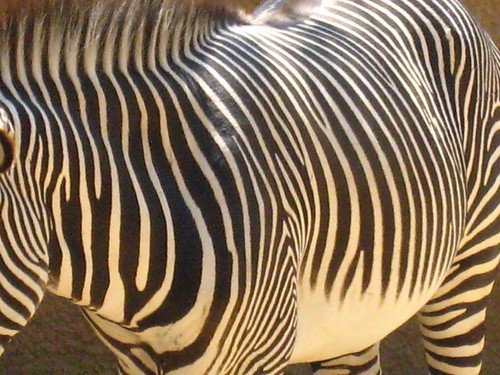

In [214]:
this_idx = 140
concept = 'lots_of_zebras'

act_path = os.path.join(working_dir,'final_acts/' + concept + '-' + layer + '.pkl')
this_dict = pickle.load(open(act_path, 'rb'))
image_list = [d for d in this_dict.keys()]

img_path = 'concepts/' + concept + '/'+ image_list[this_idx]
show_img = image.load_img(img_path)
show_img

In [192]:
this_cav = -svc.coef_[0]

In [193]:
from matplotlib.patches import Ellipse, Circle


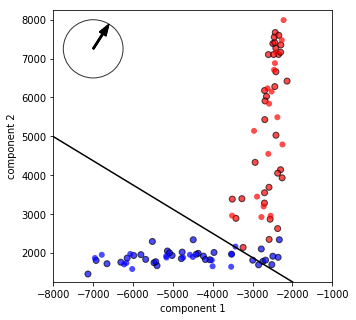

In [216]:
pca_c = pickle.load(open('pca_9_striped_1.pkl','rb'))
pca_c = pickle.load(open('spca_comps.pkl','rb'))
#pca = PCA(n_components=2)
#pca.fit(x_train)
#pca_c = pca.components_

light_blue, light_red = '#b3b8fb', '#f6889f'

train_embed = np.dot(pca_c, x_train.T)
test_embed = np.dot(pca_c, x_test.T)
c_train = ['red' if y == 0 else 'blue' for y in y_train]
c_test = ['red' if y == 0 else 'blue' for y in y_test]

fig = plt.figure(figsize=[5,5])

plt.scatter(train_embed[0], train_embed[1], color = c_train, alpha = .7, edgecolor='black' )
plt.scatter(test_embed[0], test_embed[1], color = c_test, alpha = .7, linewidth=0 )

class_embed = np.dot(pca_c, acts_class_flat.T)

c_pred = ['red' if y == 0 else 'blue' for y in preds]

#plt.scatter(class_embed[0], class_embed[1], color = c_pred, alpha=.6)

#plus_idx = 4
#plt.scatter(class_embed[0][plus_idx], class_embed[1][plus_idx], color = 'black', alpha=1,marker='+',s=40)

#_,_ = plt.xticks([], []),plt.yticks([], [])
_,_ = plt.xlabel('component 1'),plt.ylabel('component 2')

#plt.xlim([-40,40])
#plt.ylim([-40,60])

plt.xlim([-8000,-1000])
plt.ylim([1250,8250])

x1,x2 = -7000,7250
ax = plt.gca()
radius = 750
circ = plt.Circle((x1,x2), radius=radius, edgecolor='black', facecolor='white',zorder=4,alpha=.8)
#el = plt.Ellipse(
#ax.add_artist(Ellipse((x1,x2), radius*2, radius*2*(100/80),edgecolor='black', facecolor='white',zorder=4,alpha=.8))
ax.add_patch(circ)

c0,c1 =  np.dot(pca_c,-svc.coef_[0])
b = svc.intercept_
x_ = np.linspace(-10000,10,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k')

arrow_start = [x1,x2]
cav_norm = vec_norm(np.array([c0,c1])) * radius
#cav_norm = [0,8]
my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=40,length_includes_head=True,head_width=200,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)

#plt.tight_layout()
plt.savefig('new_figs/tmp.png',dpi=400,bbox_inches='tight')


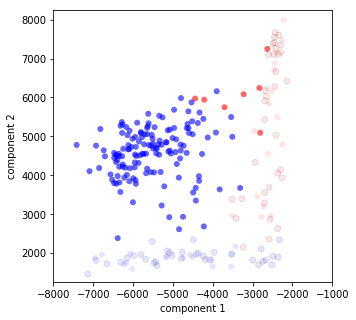

In [312]:
pca_c = pickle.load(open('spca_comps.pkl','rb'))
#pca = PCA(n_components=2)
#pca.fit(x_train)
#pca_c = pca.components_

light_blue, light_red = '#b3b8fb', '#f6889f'

train_embed = np.dot(pca_c, x_train.T)
test_embed = np.dot(pca_c, x_test.T)
c_train = ['red' if y == 0 else 'blue' for y in y_train]
c_test = ['red' if y == 0 else 'blue' for y in y_test]

fig = plt.figure(figsize=[5,5])

plt.scatter(train_embed[0], train_embed[1], color = c_train, alpha = .1, edgecolor='black' )
plt.scatter(test_embed[0], test_embed[1], color = c_test, alpha = .1, linewidth=0 )

class_embed = np.dot(pca_c, acts_class_flat.T)

c_pred = ['red' if y == 0 else 'blue' for y in preds]

plt.scatter(class_embed[0], class_embed[1], color = c_pred, alpha=.6,linewidth=0)

#plus_idx = 4
#plt.scatter(class_embed[0][plus_idx], class_embed[1][plus_idx], color = 'black', alpha=1,marker='+',s=40)

#_,_ = plt.xticks([], []),plt.yticks([], [])
_,_ = plt.xlabel('component 1'),plt.ylabel('component 2')

plt.xlim([-8000,-1000])
plt.ylim([1250,8250])

c0,c1 =  np.dot(pca_c,svc.coef_[0])
b = svc.intercept_
x_ = np.linspace(-10000,0,100)
y_ = (-c0/c1)*x_-b/c1
#plt.plot(x_, y_, 'k',alpha=.1)

plt.savefig('new_figs/tmp.png',dpi=400,bbox_inches='tight')


## Find specific points

In [206]:
class_embed[1].argmin()

75

In [207]:
class_embed[0].argmin()

74

In [208]:
class_embed[1].argmax()

140

In [128]:
## With new example

In [354]:
layer = 'mixed9'

my_class = 'lots_of_zebras'
concept_p,concept_n = 'striped_sub_1','random500_0'
acts_p,_ = get_acts_for_concept(concept_p,layer)
acts_n,_ = get_acts_for_concept(concept_n,layer)
acts_class_flat,acts_class = get_acts_for_concept(my_class,layer)

x = np.concatenate((acts_p,acts_n))
y = np.concatenate((np.zeros(50),np.ones(50)))
idx_array = np.arange(100)

x_train, x_test, y_train, y_test, idx_train, idx_test = train_test_split(x, y, idx_array, test_size=0.33, stratify=y,random_state=2)



In [355]:
my_class = 'zebra'
svc = SVC(kernel = 'linear',probability=True)
svc.fit(x_train, y_train)

cav_1 = -svc.coef_[0]
score_1 = comp_tcav(my_class,cav_1,acts_class,layer)

In [356]:
score_1

0.68

In [357]:
y_pred = svc.predict(x_test)
acc = metrics.accuracy_score(y_test,y_pred)
print(acc)

1.0


In [358]:
preds = svc.predict(acts_class_flat)
(preds.shape[0] - preds.sum()) / preds.shape[0]

0.29333333333333333

In [359]:
preds.sum()

106.0

In [302]:
p0 = svc.predict_proba(acts_class_flat)[:,0]
p0.max(),p0.min()

(0.9774929593427295, 0.014955737481317396)

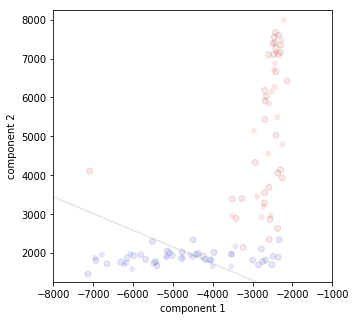

In [243]:
pca_c = pickle.load(open('spca_comps.pkl','rb'))
#pca = PCA(n_components=2)
#pca.fit(x_train)
#pca_c = pca.components_

light_blue, light_red = '#b3b8fb', '#f6889f'

train_embed = np.dot(pca_c, x_train.T)
test_embed = np.dot(pca_c, x_test.T)
c_train = ['red' if y == 0 else 'blue' for y in y_train]
c_test = ['red' if y == 0 else 'blue' for y in y_test]

fig = plt.figure(figsize=[5,5])

plt.scatter(train_embed[0], train_embed[1], color = c_train, alpha = .1, edgecolor='black' )
plt.scatter(test_embed[0], test_embed[1], color = c_test, alpha = .1, linewidth=0 )

class_embed = np.dot(pca_c, acts_class_flat.T)

c_pred = ['red' if y == 0 else 'blue' for y in preds]

#plt.scatter(class_embed[0], class_embed[1], color = c_pred, alpha=.6,linewidth=0)

#plt.scatter(class_embed[0][74], class_embed[1][74], color = 'k', alpha=.6,linewidth=2,marker='+',s=100)


#plus_idx = 4

#_,_ = plt.xticks([], []),plt.yticks([], [])
_,_ = plt.xlabel('component 1'),plt.ylabel('component 2')

plt.xlim([-8000,-1000])
plt.ylim([1250,8250])

c0,c1 =  np.dot(pca_c,svc.coef_[0])
b = svc.intercept_
x_ = np.linspace(-10000,0,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k',alpha=.1)

plt.savefig('new_figs/tmp.png',dpi=400)

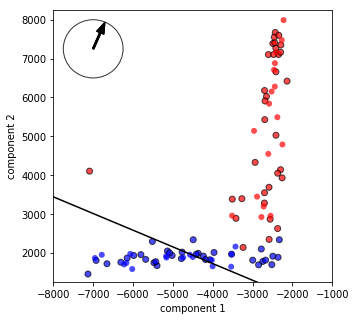

In [246]:
pca_c = pickle.load(open('spca_comps.pkl','rb'))
#pca = PCA(n_components=2)
#pca.fit(x_train)
#pca_c = pca.components_

light_blue, light_red = '#b3b8fb', '#f6889f'

train_embed = np.dot(pca_c, x_train.T)
test_embed = np.dot(pca_c, x_test.T)
c_train = ['red' if y == 0 else 'blue' for y in y_train]
c_test = ['red' if y == 0 else 'blue' for y in y_test]

fig = plt.figure(figsize=[5,5])

plt.scatter(train_embed[0], train_embed[1], color = c_train, alpha = .7, edgecolor='black' )
plt.scatter(test_embed[0], test_embed[1], color = c_test, alpha = .7, linewidth=0 )


#_,_ = plt.xticks([], []),plt.yticks([], [])
_,_ = plt.xlabel('component 1'),plt.ylabel('component 2')

plt.xlim([-8000,-1000])
plt.ylim([1250,8250])

x1,x2 = -7000,7250
ax = plt.gca()
radius = 750
circ = plt.Circle((x1,x2), radius=radius, edgecolor='black', facecolor='white',zorder=4,alpha=.8)
#el = plt.Ellipse(
#ax.add_artist(Ellipse((x1,x2), radius*2, radius*2*(100/80),edgecolor='black', facecolor='white',zorder=4,alpha=.8))
ax.add_patch(circ)

c0,c1 =  np.dot(pca_c,-svc.coef_[0])
b = svc.intercept_
x_ = np.linspace(-10000,10,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k')

arrow_start = [x1,x2]
cav_norm = vec_norm(np.array([c0,c1])) * radius
#cav_norm = [0,8]
my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=40,length_includes_head=True,head_width=200,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)


plt.savefig('new_figs/tmp.png',dpi=400,bbox_inches='tight')


In [67]:
this_cav.shape

(131072,)

In [6]:
def comp_tcav(target_class,this_cav,class_acts,bottleneck_name):
    count = 0
    class_id = mymodel.label_to_id(target_class)

    for i in range(len(class_acts)):
        act_at_idx = np.expand_dims(class_acts[i], 0)
        if get_dir(act_at_idx,class_id,this_cav,bottleneck_name):
            count += 1
    score = float(count) / float(len(class_acts))
    return score

 

def get_dir(acts, class_id, this_cav, bottleneck_name):
    grads = sess.run(mymodel.bottlenecks_gradients[bottleneck_name], 
                 {mymodel.bottlenecks_tensors[bottleneck_name]: acts,
                 mymodel.y_input: [class_id]})
                     
    grad = np.reshape(grads, -1)
    dot_prod = np.dot(grad, this_cav)

    return dot_prod < 0

def get_magnitude_list(target_class,this_cav,class_acts,bottleneck_name):
    class_id = mymodel.label_to_id(target_class)
    magnitude_list = []
    for i in range(len(class_acts)):
        act_at_idx = np.expand_dims(class_acts[i], 0)
        this_mag = get_magnitude(act_at_idx,class_id,this_cav,bottleneck_name)
        magnitude_list.append(this_mag)
    return np.array(magnitude_list)


def get_magnitude(acts, class_id, this_cav, bottleneck_name):
    grads = sess.run(mymodel.bottlenecks_gradients[bottleneck_name], 
                 {mymodel.bottlenecks_tensors[bottleneck_name]: acts,
                 mymodel.y_input: [class_id]})
                     
    grad = np.reshape(grads, -1)
    dot_prod = np.dot(grad, this_cav)

    return dot_prod

def get_magnitude_and_grad(acts, class_id, this_cav, bottleneck_name):
    grads = sess.run(mymodel.bottlenecks_gradients[bottleneck_name], 
                 {mymodel.bottlenecks_tensors[bottleneck_name]: acts,
                 mymodel.y_input: [class_id]})
                     
    grad = np.reshape(grads, -1)
    dot_prod = np.dot(grad, this_cav)

    return dot_prod,grad

In [7]:
## define functions
pca_components = pickle.load(open('pca/pca_components_mixed9.pkl', 'rb'))

def get_dir_from_pert(pred_1):
    a = 0
    pred_2 = second_part_model.get_predictions(pred_1)
    decoded = decode_predictions(pred_2, top=1000)
    p1 = get_p(decoded,'zebra')

    a = .01
    to_concept = 'striped_sub_1'
    pred_1_pert = this_cav.perturb_act(pred_1,to_concept,alpha = a)
    pred_2 = second_part_model.get_predictions(pred_1_pert)
    decoded = decode_predictions(pred_2, top=1000)
    p2 = get_p(decoded,'zebra')

    return (p2-p1) / a

def get_p(decoded,class_name):
    for d in decoded[0]:
        if d[1] ==class_name:
            z = d[2]
    if z:
        return z


def vector_norm(vec):
    norm_const = math.sqrt(vec[0]*vec[0] + vec[1]*vec[1])
    return vec / norm_const

def vec_norm(vec):
    return  vec / np.linalg.norm(vec)

## CAV distance
def euclidean_distance(a,b):
    return np.linalg.norm(a-b)

def cosine_similarity(v1,v2):
    # compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy / math.sqrt(sumxx*sumyy)

def files_from_dir(a_dir):
    onlyfiles = [f for f in os.listdir(a_dir) if os.path.isfile(os.path.join(a_dir, f))]
    return onlyfiles

def files_from_dir_ext(a_dir,ext):
    onlyfiles = [f for f in os.listdir(a_dir) if os.path.isfile(os.path.join(a_dir, f))]
    this_ext = [e for e in onlyfiles if ext in e.lower()]
    return this_ext

def prep2(filename):
    shape=(299, 299)
    img = np.array(PIL.Image.open(open(filename, 'rb')).convert('RGB').resize(shape, PIL.Image.BILINEAR))
    # Normalize pixel values to between 0 and 1.
    img = np.float32(img) / 255.0
    if not (len(img.shape) == 3 and img.shape[2] == 3):
        return None
    else:
        return img

this_img = np.expand_dims(prep2('concepts/random500_0/ILSVRC2012_val_00001172.JPEG'),axis=0)
    
layer_dict = dict([(layer.name, layer) for layer in model.layers])
sess = K.get_session()

layer_name = 'mixed9'

these_acts = layer_dict[layer_name].output
get_acts_func = K.function([model.input],[these_acts])

#name_ph = K.placeholder(dtype='string')
#these_acts_for_layer = layer_dict[name_ph].output
#get_acts_for_layer_func = K.function([name_ph,model.input],[these_acts_for_layer])

def get_acts(input_img):
    outs = get_acts_func([input_img])
    acts_value = outs[0]
    return acts_value.reshape(-1)

def get_acts_for_layer(layer_name,input_img):
    acts_value = layer_dict[layer_name].output
    outs = get_acts_for_layer_func([layer_name,input_img])
    acts_value = outs[0]
    return acts_value.reshape(-1)


acts_mixed0_f = K.function([model.input],[layer_dict['mixed0'].output])
acts_mixed1_f = K.function([model.input],[layer_dict['mixed1'].output])
acts_mixed2_f = K.function([model.input],[layer_dict['mixed2'].output])
acts_mixed3_f = K.function([model.input],[layer_dict['mixed3'].output])
acts_mixed4_f = K.function([model.input],[layer_dict['mixed4'].output])
acts_mixed5_f = K.function([model.input],[layer_dict['mixed5'].output])
acts_mixed6_f = K.function([model.input],[layer_dict['mixed6'].output])
acts_mixed7_f = K.function([model.input],[layer_dict['mixed7'].output])
acts_mixed8_f = K.function([model.input],[layer_dict['mixed8'].output])
acts_mixed9_f = K.function([model.input],[layer_dict['mixed9'].output])
acts_mixed10_f = K.function([model.input],[layer_dict['mixed10'].output])

def get_acts_for_layer_new(layer_name,input_img):
    acts = None
    if layer_name=='mixed0':
        acts = acts_mixed0_f([input_img])[0]
    if layer_name=='mixed1':
        acts = acts_mixed1_f([input_img])[0]
    if layer_name=='mixed2':
        acts = acts_mixed2_f([input_img])[0]
    if layer_name=='mixed3':
        acts = acts_mixed3_f([input_img])[0]
    if layer_name=='mixed4':
        acts = acts_mixed4_f([input_img])[0]
    if layer_name=='mixed5':
        acts = acts_mixed5_f([input_img])[0]
    if layer_name=='mixed6':
        acts = acts_mixed6_f([input_img])[0]
    if layer_name=='mixed7':
        acts = acts_mixed7_f([input_img])[0]
    if layer_name=='mixed8':
        acts = acts_mixed8_f([input_img])[0]
    if layer_name=='mixed9':
        acts = acts_mixed9_f([input_img])[0]
    if layer_name=='mixed10':
        acts = acts_mixed10_f([input_img])[0]
    
    return acts


bn_names = ['mixed0','mixed1','mixed2','mixed3','mixed4','mixed5','mixed6','mixed7','mixed8','mixed9','mixed10']

size_dict = {}
for bn in bn_names:
    acts_orig = get_acts_for_layer_new(bn,this_img)
    size_dict[bn] = acts_orig.reshape(-1).shape[0]
    
size_dict_orig = {}
for bn in bn_names:
    acts_orig = get_acts_for_layer_new(bn,this_img)
    size_dict_orig[bn] = acts_orig.shape

In [8]:
## get activations for concept, layer


def get_acts_for_concept(concept,layer):
    concept_dir = os.path.join(working_dir,'concepts/'+concept)
    image_list = files_from_dir_ext(concept_dir,'jp')
    image_list.sort()

    act_path = os.path.join(working_dir,'final_acts/' + concept + '-' + layer + '.pkl')

    n = size_dict[layer]
    nn = size_dict_orig[layer]

    try:
        this_dict = pickle.load(open(act_path, 'rb'))
    except:
        this_dict = {}
        
    #print(nn)
    
    acts_ran = np.zeros((len(image_list),n))
    orig = np.zeros((len(image_list),nn[1],nn[2],nn[3]))
    
    for idx,image_path in enumerate(image_list):
        if image_path not in this_dict:
            img = prep2(os.path.join(concept_dir,image_path))
            this_img = np.expand_dims(img, axis=0)
            acts_orig = get_acts_for_layer_new(layer,this_img)
            acts_ran[idx] = acts_orig.reshape(-1)
            orig[idx] = acts_orig
            this_dict[image_path] = (acts_orig.reshape(-1),acts_orig)
        else:
            acts_ran[idx],orig[idx] = this_dict[image_path]
            #print('acts already exist')

    pickle.dump(this_dict,open(act_path, 'wb'))
    
    return acts_ran,orig


def make_orig_cav(x_train,y_train):
    lm = linear_model.SGDClassifier(alpha=.1)
    lm.fit(x_train, y_train)
    this_cav = -lm.coef_[0]
    return this_cav

def make_orig_cav_seed(x_train,y_train,seed):
    lm = linear_model.SGDClassifier(alpha=.1,random_state=seed)
    lm.fit(x_train, y_train)
    this_cav = -lm.coef_[0]
    return this_cav

def make_L1_cav(x_train,y_train):
    x_train_p_list,x_train_n_list =[],[]
    for idx,a in enumerate(x_train):
        if y_train[idx] == 0:
            x_train_p_list.append(a)
        else:
            x_train_n_list.append(a)

    x_train_p, x_train_n = np.array(x_train_p_list),np.array(x_train_n_list)
    L1_cav = get_L1(x_train_p) - get_L1(x_train_n)
    return L1_cav

def make_centroid_cav(x_train,y_train):
    x_train_p_list,x_train_n_list =[],[]
    for idx,a in enumerate(x_train):
        if y_train[idx] == 0:
            x_train_p_list.append(a)
        else:
            x_train_n_list.append(a)

    x_train_p, x_train_n = np.array(x_train_p_list),np.array(x_train_n_list)
    centroid_cav = x_train_p.mean(axis=1) - x_train_n.mean(axis=1)
    return centroid_cav

def make_L1_cav_and_means(x_train,y_train):
    x_train_p_list,x_train_n_list =[],[]
    for idx,a in enumerate(x_train):
        if y_train[idx] == 0:
            x_train_p_list.append(a)
        else:
            x_train_n_list.append(a)

    x_train_p, x_train_n = np.array(x_train_p_list),np.array(x_train_n_list)
    mu_p = get_L1(x_train_p)
    mu_n = get_L1(x_train_n)
    L1_cav = mu_p - mu_n
    return L1_cav,mu_p,mu_n

def get_L1(act_for_L1):
    return np.linalg.norm(act_for_L1.T,1,axis = 1) / act_for_L1.shape[1]